In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Nivell 1
#### Exercici 1
Agafa el conjunt de dades que vulguis i realitza un pipeline i un gridsearch aplicant l'algorisme de Random Forest.

In [37]:
#Vamos a trabajar con nuestro dataset de la liga española de futbol
df=pd.read_csv('Desktop/DataScience/datasets/liga/SP1.csv')
df=df.iloc[:,5:23]
df.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,0,0,D,0,0,D,8,6,1,3,17,13,3,3,4,4,1,0
1,2,0,H,0,0,D,4,9,2,2,8,10,1,2,3,4,0,0
2,0,2,A,0,1,A,12,6,3,4,14,21,6,2,2,2,0,0
3,0,1,A,0,0,D,7,11,2,4,19,17,6,4,3,3,0,0
4,1,1,D,1,0,H,8,8,3,2,15,17,5,3,4,1,0,0


**Columnas:**
1. Div = League Division
2. Date = Match Date (dd/mm/yy)
3. Time = Time of match kick off
4. HomeTeam = Home Team
5. AwayTeam = Away Team
6. FTHG = Full Time Home Team Goals
7. FTAG = Full Time Away Team Goals
8. FTR  = Full Time Result (H=Home Win, D=Draw, A=Away Win)
9. HTHG = Half Time Home Team Goals
10. HTAG = Half Time Away Team Goals
11. HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)
12. HS = Home Team Shots
13. AS = Away Team Shots
14. HST = Home Team Shots on Target
15. AST = Away Team Shots on Target
16. HF = Home Team Fouls Committed
17. AF = Away Team Fouls Committed
18. HC = Home Team Corners
19. AC = Away Team Corners
20. HY = Home Team Yellow Cards
21. AY = Away Team Yellow Cards
22. HR = Home Team Red Cards
23. AR = Away Team Red Cards
24. B365H = Bet365 home win odds
25. B365D = Bet365 draw odds
26. B365A = Bet365 away win odds

In [38]:
#No hay nulos
df.isnull().sum().sum()==0

True

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
FTHG    300 non-null int64
FTAG    300 non-null int64
FTR     300 non-null object
HTHG    300 non-null int64
HTAG    300 non-null int64
HTR     300 non-null object
HS      300 non-null int64
AS      300 non-null int64
HST     300 non-null int64
AST     300 non-null int64
HF      300 non-null int64
AF      300 non-null int64
HC      300 non-null int64
AC      300 non-null int64
HY      300 non-null int64
AY      300 non-null int64
HR      300 non-null int64
AR      300 non-null int64
dtypes: int64(16), object(2)
memory usage: 42.3+ KB


In [40]:
# creamos dummies para HTR
X_dummies=pd.get_dummies(data=df, columns=['HTR'],drop_first=True)
X_dummies.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTR_D,HTR_H
0,0,0,D,0,0,8,6,1,3,17,13,3,3,4,4,1,0,1,0
1,2,0,H,0,0,4,9,2,2,8,10,1,2,3,4,0,0,1,0
2,0,2,A,0,1,12,6,3,4,14,21,6,2,2,2,0,0,0,0
3,0,1,A,0,0,7,11,2,4,19,17,6,4,3,3,0,0,1,0
4,1,1,D,1,0,8,8,3,2,15,17,5,3,4,1,0,0,0,1


In [41]:
#Valores en el skew fuera de (-0.5,0.5) nos dice que nuestra distribución normal no es simétrica.
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
FTHG,0.949435,0.880761
FTAG,1.034944,1.359900
HTHG,1.303268,1.719378
HTAG,1.377708,2.043619
HS,0.660188,0.453663
AS,0.596485,0.548242
HST,0.815311,0.779050
AST,0.670108,0.122108
HF,0.262211,-0.088891
AF,0.408011,0.489969


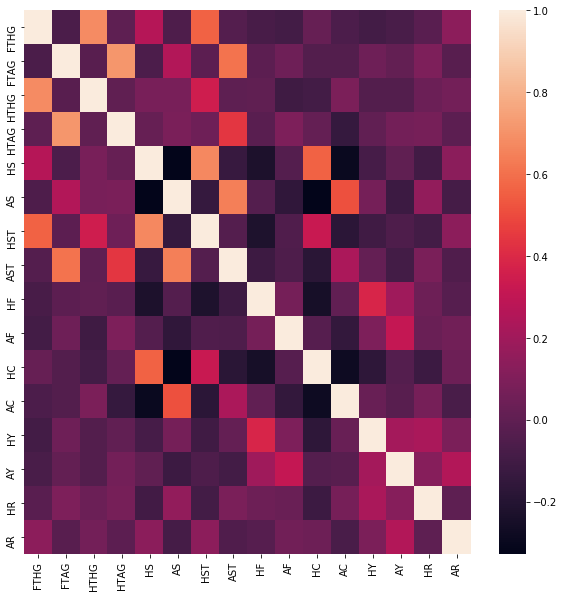

In [42]:
#Las features están poco correladas
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

In [43]:
#Separamos features y labels
X=X_dummies.drop(['FTR'],'columns')
y=X_dummies.FTR

In [44]:
X.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTR_D,HTR_H
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1.336667,1.140000,0.610000,0.540000,11.346667,9.940000,3.96000,3.463333,13.463333,13.326667,4.346667,4.383333,2.183333,2.360000,0.100000,0.103333,0.456667,0.293333
std,1.172421,1.047564,0.791616,0.728126,4.808697,4.235114,2.30422,2.030369,4.145593,4.234745,2.651400,2.698269,1.376969,1.403674,0.300501,0.336203,0.498951,0.456051
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.00000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,8.000000,7.000000,2.00000,2.000000,10.750000,10.000000,2.750000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,11.000000,9.000000,4.00000,3.000000,13.000000,13.000000,4.000000,4.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,14.000000,13.000000,5.00000,5.000000,16.000000,16.000000,6.000000,6.000000,3.000000,3.000000,0.000000,0.000000,1.000000,1.000000
max,6.000000,6.000000,4.000000,4.000000,28.000000,27.000000,13.00000,10.000000,26.000000,30.000000,15.000000,14.000000,8.000000,7.000000,1.000000,2.000000,1.000000,1.000000


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# en el pipeline aplicamos transformación a distribución normal simétrica, estandarización y random Forest para clasificación

steps=[('normal_dist',PowerTransformer()),('scaler',StandardScaler()),('random_forest',RandomForestClassifier())]
pipeline = Pipeline(steps)

In [46]:
#Creamos train y test set con stratify
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,stratify=y)

In [47]:
#Definimos hiperparámetros
param_grid={"random_forest__max_depth":[4,6],
           "random_forest__max_features": [8,9],
           "random_forest__min_samples_split": [8,9]}

In [48]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [49]:
#Aplicamos gridSearchCV
rs_grid=GridSearchCV(pipeline, param_grid=param_grid)

In [50]:
rs_grid.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('normal_dist', PowerTransformer()),
                                       ('scaler', StandardScaler()),
                                       ('random_forest',
                                        RandomForestClassifier())]),
             param_grid={'random_forest__max_depth': [4, 6],
                         'random_forest__max_features': [8, 9],
                         'random_forest__min_samples_split': [8, 9]})

In [51]:
rs_grid.best_estimator_

Pipeline(steps=[('normal_dist', PowerTransformer()),
                ('scaler', StandardScaler()),
                ('random_forest',
                 RandomForestClassifier(max_depth=4, max_features=8,
                                        min_samples_split=8))])

In [52]:
y_pred=rs_grid.best_estimator_.predict(X_train)

In [53]:
#accuracy train
np.round(accuracy_score(y_train,y_pred),2)

0.99

In [54]:
y_pred=rs_grid.best_estimator_.predict(X_test)

In [55]:
#accuracy test
np.round(accuracy_score(y_test,y_pred),2)

0.98

In [56]:
#precision test
precision_score(y_test,y_pred,average=None) #hay que tener en cuenta que es multiclase

array([1.  , 1.  , 0.96])

In [57]:
#recall
recall_score(y_test,y_pred,average=None)

array([0.94444444, 1.        , 1.        ])

Tenemos una accuracy para train y test muy parecidas. El algoritmo es capaz de clasificar muy bien los resultados, lástima
que necesitemos los datos una vez los partidos han finalizado!!!

#### Exercici 2
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules

**[Discurso de Gettysburg](https://es.wikipedia.org/wiki/Discurso_de_Gettysburg)**

Nos hemos puesto solemnes y he escogido el discurso pronunciado por Abraham Lincoln  cuatro meses y medio después de la batalla de Gettysburg durante la Guerra de Secesión Americana. Las breves palabras de Lincoln resumieron la guerra en dos o tres minutos, en diez oraciones, y alrededor de 300 palabras y es considerado como uno de los discursos más importantes de la historia.

In [58]:
with open('Desktop/Repos ItAcademy/ML avanzado/Abrahan Lincoln speech.txt', 'r') as f:
        text = f.read()

In [59]:
text

'Four score and seven years ago our fathers brought forth upon this continent, a new nation, conceived in Liberty, and dedicated to the proposition that all men are created equal.\nNow we are engaged in a great civil war, testing whether that nation, or any nation so conceived and so dedicated, can long endure. We are met on a great battle-field of that war. We have come to dedicate a portion of that field, as a final resting place for those who here gave their lives that that nation might live. It is altogether fitting and proper that we should do this.\n\nBut, in a larger sense, we can not dedicateâ€”we can not consecrateâ€”we can not hallowâ€”this ground. The brave men, living and dead, who struggled here, have consecrated it, far above our poor power to add or detract. The world will little note, nor long remember what we say here, but it can never forget what they did here. It is for us the living, rather, to be dedicated here to the unfinished work which they who fought here have

In [60]:
#Podemos separar el texto por frases
from nltk.tokenize import sent_tokenize,word_tokenize
tokenized_text=sent_tokenize(text)
print('Tenemos %s frases' %len(tokenized_text))

Tenemos 11 frases


In [61]:
#O por palabrars
tokenized_word=word_tokenize(text)
print('Tenemos %s palabras' %len(tokenized_word))

Tenemos 314 palabras


In [62]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 152 samples and 314 outcomes>


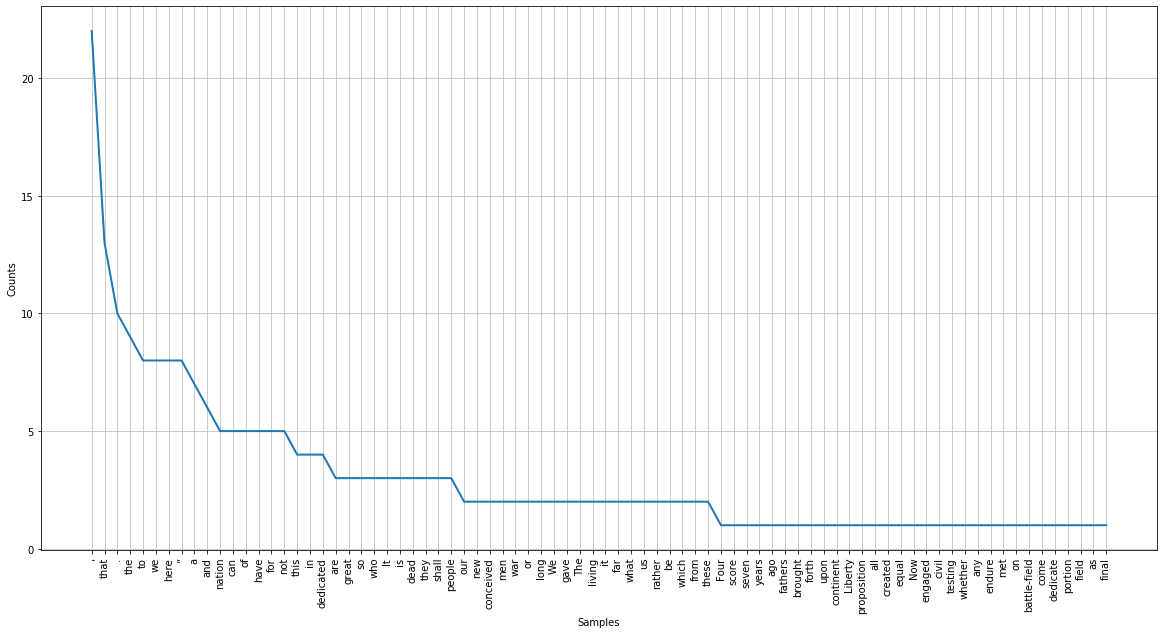

In [63]:
# Frequency Distribution Plot
plt.figure(figsize=(20,10))
fdist.plot(80,cumulative=False)
plt.show()

Vemos que las palabras usadas con más frecuencias son artículos, conjunciones, etc. que eliminaremos más tarde al aplicar stopwords.
A continuación encontramos palabras como: nation, dedicated, people, war,etc. que nos da una idea de cual es el mensaje del texto.

# Nivell 2
#### Exercici 1
Treu les stopwords i realitza stemming al teu conjunt de dades.

In [64]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))

In [65]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
#print("Tokenized Sentence:",tokenized_word)
print("Filterd Sentence:",filtered_sent)
print('Tenemos %s palabras' %len(filtered_sent))

Filterd Sentence: ['Four', 'score', 'seven', 'years', 'ago', 'fathers', 'brought', 'forth', 'upon', 'continent', ',', 'new', 'nation', ',', 'conceived', 'Liberty', ',', 'dedicated', 'proposition', 'men', 'created', 'equal', '.', 'Now', 'engaged', 'great', 'civil', 'war', ',', 'testing', 'whether', 'nation', ',', 'nation', 'conceived', 'dedicated', ',', 'long', 'endure', '.', 'We', 'met', 'great', 'battle-field', 'war', '.', 'We', 'come', 'dedicate', 'portion', 'field', ',', 'final', 'resting', 'place', 'gave', 'lives', 'nation', 'might', 'live', '.', 'It', 'altogether', 'fitting', 'proper', '.', 'But', ',', 'larger', 'sense', ',', 'dedicateâ€', '”', 'consecrateâ€', '”', 'hallowâ€', '”', 'ground', '.', 'The', 'brave', 'men', ',', 'living', 'dead', ',', 'struggled', ',', 'consecrated', ',', 'far', 'poor', 'power', 'add', 'detract', '.', 'The', 'world', 'little', 'note', ',', 'long', 'remember', 'say', ',', 'never', 'forget', '.', 'It', 'us', 'living', ',', 'rather', ',', 'dedicated', 'un

In [66]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

#print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Stemmed Sentence: ['four', 'score', 'seven', 'year', 'ago', 'father', 'brought', 'forth', 'upon', 'contin', ',', 'new', 'nation', ',', 'conceiv', 'liberti', ',', 'dedic', 'proposit', 'men', 'creat', 'equal', '.', 'now', 'engag', 'great', 'civil', 'war', ',', 'test', 'whether', 'nation', ',', 'nation', 'conceiv', 'dedic', ',', 'long', 'endur', '.', 'We', 'met', 'great', 'battle-field', 'war', '.', 'We', 'come', 'dedic', 'portion', 'field', ',', 'final', 'rest', 'place', 'gave', 'live', 'nation', 'might', 'live', '.', 'It', 'altogeth', 'fit', 'proper', '.', 'but', ',', 'larger', 'sens', ',', 'dedicateâ€', '”', 'consecrateâ€', '”', 'hallowâ€', '”', 'ground', '.', 'the', 'brave', 'men', ',', 'live', 'dead', ',', 'struggl', ',', 'consecr', ',', 'far', 'poor', 'power', 'add', 'detract', '.', 'the', 'world', 'littl', 'note', ',', 'long', 'rememb', 'say', ',', 'never', 'forget', '.', 'It', 'us', 'live', ',', 'rather', ',', 'dedic', 'unfinish', 'work', 'fought', 'thu', 'far', 'nobli', 'advanc',

# Nivell 3
#### Exercici 1
Realitza sentiment analysis al teu conjunt de dades.

In [67]:
from textblob import TextBlob

In [68]:
feeling=TextBlob(text)

In [69]:
feeling.sentiment

Sentiment(polarity=0.15302188552188553, subjectivity=0.5394725028058361)

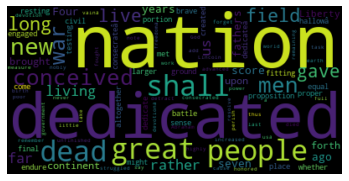

In [70]:
# Bag of words:
from wordcloud import WordCloud
textt = " ".join(review for review in filtered_sent)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

La polaridad analiza los sentimientos, una polaridad igual a 1 indica un sentimiento positivo mientras que un valor de -1 dice que es totalmente negativo.En nuestro caso tiene un valor de 0.15 que sugiere que es ligeramente positivo.

En la subjetividad, el valor 0 indica un texto muy objetivo y 1 que es subjetivo. El valor obtenido de 0.54 nos muestra que es un texto más subjetivo que objetivo.

El bag of words es otra forma gráfica de mostrar la frecuencia de palabras visto anteriormente. Como antes, palabras como: nation, dedicated, great, people, etc. nos dan una idea del mensaje.

El discurso de Gettysburg es un texto que habla de la situación de guerra del país, del reconocimiento al sacrificio de los soldados fallecidos y de la esperanza en el futuro. Encaja totalmente con el análisis realizado. Comienza con una breve mención al pasado y a la guerra con datos que es más objetiva y neutra, centra más los valores de polaridad y subjetividad, pero finaliza con un mensaje de esperanza que es una emoción, totalmente subjetiva e inherentemente positiva.